In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
h = 2.0/N
Npop = 100
Ncross = 100
Ngen = 1000
Nbest = 10
Sigma = 0.1

In [2]:
def normalize(indiv: np.ndarray):
    integral = indiv.dot(indiv) * h
    indiv = indiv * np.sqrt(2.0 / integral)
    while indiv.max() > 2.0:
        indiv = np.where(indiv > 2.0, 2.0, indiv)
        outcount = np.count_nonzero(indiv == 2.0)
        integral = (indiv[indiv < 2.0] * indiv[indiv < 2.0]).sum() * h
        c = np.sqrt((2.0 - 4.0 * outcount * h) / integral)
        np.where(indiv < 2.0, indiv * c, 2.0)
    return indiv

def objfunc(indiv: np.ndarray):
    return indiv.sum() * h

In [3]:
popul = np.random.rand(Npop, N)
for i in range(Npop):
    popul[i] = normalize(popul[i])
bestez = np.zeros((Nbest, N))
best = np.random.rand(N)
descendent = np.zeros(N)
objfuncs = np.zeros(0)

In [ ]:
for i in range(Ngen):
    #Breeding
    newpop = np.zeros((0,N))
    for j in range(Ncross):
        firstparent = np.random.randint(0, popul.shape[0])
        secondparent = np.random.randint(0, popul.shape[0])
        maxdiff = ((popul[firstparent] - popul[secondparent]) ** 2).sum()
        for k in range(popul.shape[0]):
            guess = ((popul[firstparent] - popul[k]) ** 2).sum()
            if guess > maxdiff:
                maxdiff = guess
                secondparent = k
        descendent = normalize(popul[firstparent] + popul[secondparent])
        newpop = np.append(newpop, descendent.reshape(1,N), axis=0)
    for j in range(popul.shape[0]):
        descendent = np.copy(popul[j])
        descendent[np.random.randint(0, N)] += np.random.randn() * Sigma
        descendent = normalize(descendent)
        newpop = np.append(newpop, descendent.reshape(1,N), axis=0)
    popul = np.append(popul, newpop, axis=0)
    
    #Selection
    objfuncs = np.zeros(0)
    newpop = np.zeros((0,N))
    for j in range(popul.shape[0]):
        objfuncs = np.append(objfuncs, objfunc(popul[j]))
    if (objfunc(best) < objfuncs.max()):
        best = popul[np.argmax(objfuncs)]
    if (i + 1) % (Ngen // Nbest) == 0:
        bestez[(i + 1) * Nbest // Ngen - 1] = best
        print(objfunc(best))
    probs = objfuncs * objfuncs * objfuncs
    probs = Npop * (probs / probs.sum())
    for j in range(popul.shape[0]):
        if np.random.rand() < probs[j]:
            newpop = np.append(newpop, popul[j].reshape(1,N), axis=0)
    popul = newpop

1.9805835427040672
1.9805835427040672
1.9805835427040672
1.9805835427040672
1.9805835427040672
1.9805835427040672
1.9805835427040672
1.9805835427040672


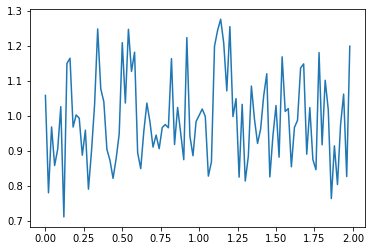

In [5]:
plt.plot(np.arange(0.0, 2.0 - 0.5 * h, h), best)